In [1]:
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile, NWBHDF5IO
import pynwb
import pynwb.behavior
import numpy as np
from pathlib import Path

In [2]:
n_sessions = 1
session_names = ['mouse1']

for session in range(n_sessions):
    session_name = session_names[session]
    nwbfile = NWBFile(session_description=f'bmi experiment data for {session_name}', 
                      identifier=f'{session_name}',
                      session_start_time=datetime.now(tzlocal()),
                      file_create_date=datetime.now(tzlocal()))
    behavior_module = nwbfile.create_processing_module(name='behavior',
                                                       description='all behavioral data')
    face_rhythm_data = pynwb.behavior.BehavioralTimeSeries(name='face_rhythm')
    positions = np.load('../data/processed/positions_convDR_absolute.npy')
    positions_flip = np.moveaxis(positions,-1,0)
    position_ts = pynwb.TimeSeries(name='positions',
                         data=positions_flip, 
                         unit='mm',
                         starting_time=0.0, 
                         rate=1.0)
    face_rhythm_data.add_timeseries(position_ts)
    behavior_module.add(face_rhythm_data)
    with NWBHDF5IO('test.nwb', 'w') as io:
        io.write(nwbfile)

In [ ]:
def save_data(config_filepath, save_name, data_to_save):
    """
    save an npy file with data

    Parameters
    ----------
    config_filepath (Path): path to the config file
    save_name (str): name of the object to be saved
    data_to_save (np.ndarray): (usually) a numpy array

    Returns
    -------

    """

    config = load_config(config_filepath)
    save_dir = config['save_dir']
    save_path = f'{save_dir}/{save_name}.npy'
    np.save(save_path, data_to_save, allow_pickle=True)
    config[f'path_{save_name}'] = save_path
    save_config(config, config_filepath)

In [5]:
yes = nwbfile.processing['behavior']['face_rhythm']['positions']

KeyError: 'behavior/face_rhythm/positions'

In [37]:
yes.data.shape

(18000, 1797, 2)

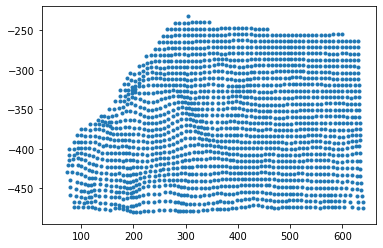

In [61]:
from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()
this = plt.plot(yes.data[1000,:,0],-yes.data[1000,:,1],'.')

def drawframe(n):
    this[0].set_data(yes.data[n,:,0],-yes.data[n,:,1])

anim = animation.FuncAnimation(fig, drawframe, frames=100)

In [62]:
from IPython.display import HTML
HTML(anim.to_html5_video())